In [ ]:
%pip install pandas matplotlib seaborn

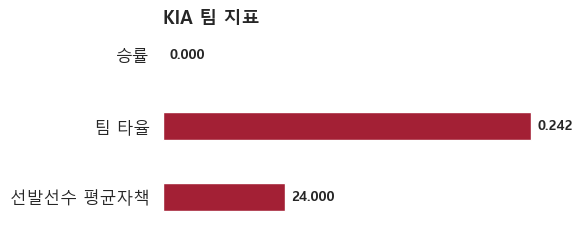

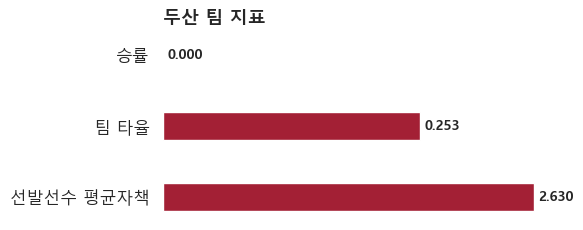

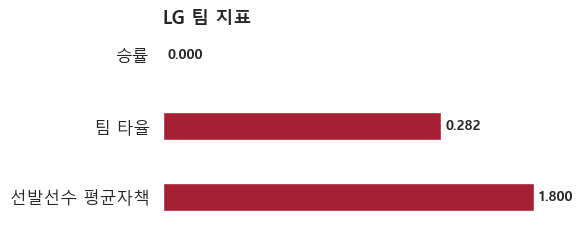

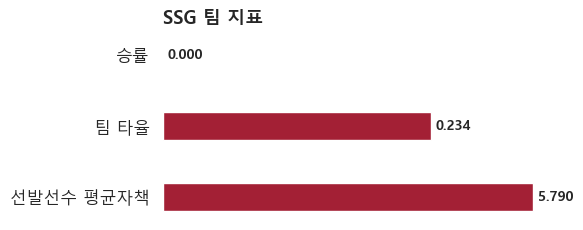

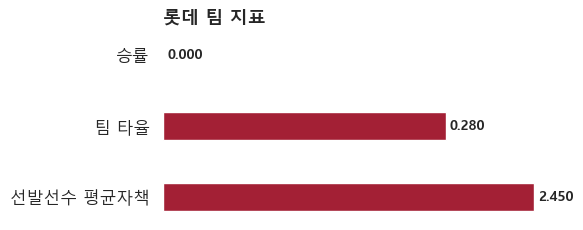

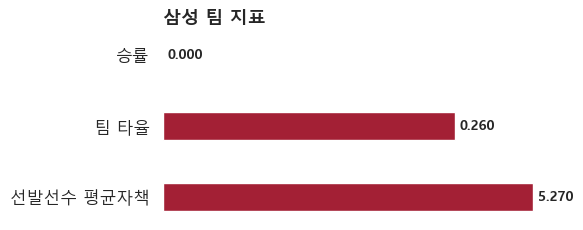

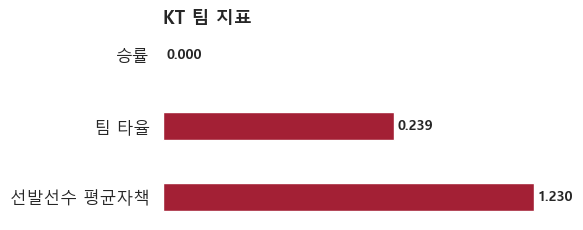

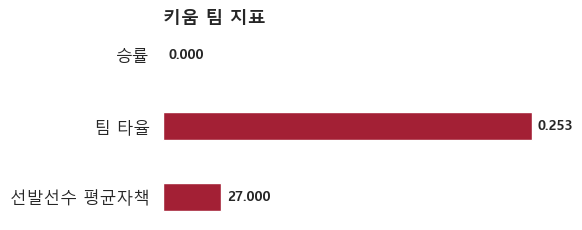

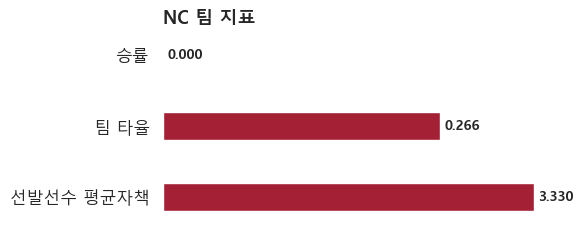

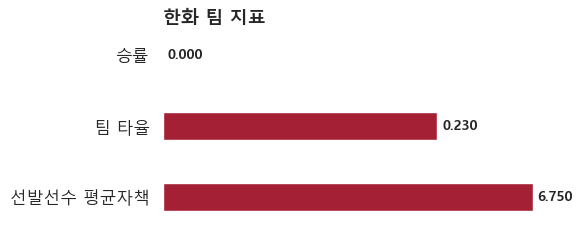

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# CSV 불러오기
df_main = pd.read_csv('../../csv/match_up_main.csv')

# 색상 지정
bar_color = '#a32035'

# 기준값 설정
max_ba = 0.4
max_era = 30.0
max_win_rate = 1.0

# 경기 수만큼 반복
for i in range(len(df_main)):
    # 팀 정보 및 지표 추출
    home_team = df_main['팀명1'][i]
    away_team = df_main['팀명2'][i]
    
    team_1_ba = df_main['팀 BA 1'][i]
    team_2_ba = df_main['팀 BA 2'][i]
    
    starting_line_up_avg_1 = df_main['선발투수1 AVG'][i]
    starting_line_up_avg_2 = df_main['선발투수2 AVG'][i]
    
    # 정규화
    norm_team_1_ba = team_1_ba / max_ba
    norm_team_2_ba = team_2_ba / max_ba
    
    norm_era_1 = 1 - (starting_line_up_avg_1 / max_era)
    norm_era_2 = 1 - (starting_line_up_avg_2 / max_era)
    
    norm_win_rate = 0 / max_win_rate  # 승률은 임의로 0

    # 정규화된 값
    values_1 = [norm_win_rate, norm_team_1_ba, norm_era_1]
    values_2 = [norm_win_rate, norm_team_2_ba, norm_era_2]
    
    # 실제 표시할 원래 값
    raw_values_1 = [0, team_1_ba, starting_line_up_avg_1]
    raw_values_2 = [0, team_2_ba, starting_line_up_avg_2]
    
    labels = ['승률', '팀 타율', '선발선수 평균자책']

    # 순서 뒤집기
    labels = labels[::-1]
    values_1 = values_1[::-1]
    values_2 = values_2[::-1]
    raw_values_1 = raw_values_1[::-1]
    raw_values_2 = raw_values_2[::-1]

    # 홈팀 그래프
    fig, ax = plt.subplots(figsize=(6, 2.5))
    ax.barh(labels, values_1, color=bar_color, height=0.4)
    for j, value in enumerate(values_1):
        ax.text(value + 0.01, j, f'{raw_values_1[j]:.3f}', va='center', ha='left', fontsize=10, fontweight='bold')

    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.tick_params(left=False, bottom=False)
    ax.set_xticks([])
    ax.grid(False)
    ax.set_title(f'{home_team} 팀 지표', fontsize=13, weight='bold', loc='left')
    plt.tight_layout()
    plt.show()

    # 어웨이팀 그래프
    fig, ax = plt.subplots(figsize=(6, 2.5))
    ax.barh(labels, values_2, color=bar_color, height=0.4)
    for j, value in enumerate(values_2):
        ax.text(value + 0.01, j, f'{raw_values_2[j]:.3f}', va='center', ha='left', fontsize=10, fontweight='bold')

    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.tick_params(left=False, bottom=False)
    ax.set_xticks([])
    ax.grid(False)
    ax.set_title(f'{away_team} 팀 지표', fontsize=13, weight='bold', loc='left')
    plt.tight_layout()
    plt.show()


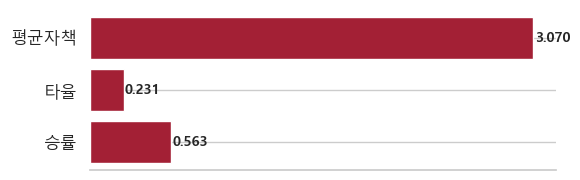